<a href="https://colab.research.google.com/github/SantiagoValenciaCarmona/practicas/blob/main/Taller_SerieyTFAudio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicios

- Presente y describa el modelo que utiliza la FFT para el cálculo de los armónicos.

- Realice una comparación del tiempo de cómputo requerido para el cálculo de la transformada discreta de Fourier utilizado la estimación por sumatoria vs la FFT. Pruebe distintos valores de longitud de la señal de entrada (4,8,16,32,64,128,256,512,1024,2048,4096). Presente una gráfica comparativa de los tiempos de ejecución en segundos vs la longitud de la señal de entrada.

- Implemente un filtro pasa bajas, un pasa altas, un pasa bandas, y un rechaza bandas utilizando la FFT y la iFFT sobre 5 segundos de su canción favorita de YouTube.



* **Desarrollo**


*Primer Punto*

*  La transformada rapida de fourier, es un algortimo eficiente que permite calcular la transfomada discreta de fourier (DFT), y si inversa (IDFT). El algoritmo (FFT) impone algunas limitaciones en la señal y en el espectro resultante ya que la señal muestreada y que se va a transformar debe consistir de un numero de muestras igual a una potencia de dos.

 La trasformada rapida de fourier se ilustra en el siguiente ejemplo, calculando la FFT de un conjunto de cuatro muestras de datos. Se define el conjunto de muestras de una señal como la señal $X_0 [n]$ en tiempo discreto de forma que los datos de entrada para el algoritmo sean {${X_0 [0], X_0 [1], X_0 [2], X_0 [3]}$}. Para este caso de 4 puntos de datos, recordando el algebra lineal es posible escribir la FFT en forma de matriz como:

 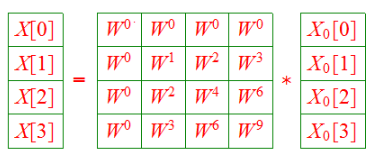

 Puesto que los datos de entrada estan representados por un vector-columna de 4 componentes. Efectuar la multiplicación usual de matrices directa requeriria $N^2$ multiplicaciones complejas y $N(N-1)$ adiciones complejas. Por lo tanto, puede escribirse de la siguiente manera:

 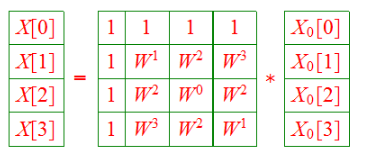

 Los elementos  $X_1$ y $X_2$ han cambiado de lugar en el vector que se encuentra del lado izquierdo. Cuando se multipliquen las matrices, los renglones 1 y 2, también se intercambiarán. Después, se calcula el número de multiplicaciones y adiciones que se requieren. Primero, se identifica el resultado de multiplicar la segunda matriz cuadrada por el conjunto de datos de entrada como:

  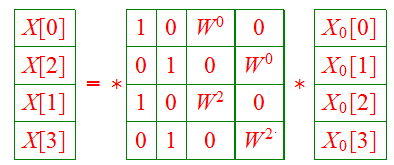

  Recordando como se multiplican las matrices, el primer elemento del vector de la izquierda es:

 $X[0]=X_0[0]+W^0X_0[2]$
   
   Así, en total, se necesitan cuatro multiplicaciones y ocho adiciones. Puesto que, computacionalmente, las multiplicaciones requieren por lo general mucho más tiempo de cómputo que las adiciones, el algoritmo de FFT para cuatro puntos es alrededor de cuatro veces más rápido que la FDT directa. El siguiente diagrama muestra, en forma de gráfica de flujo de señales, como se realizan las operaciones necesarias.

 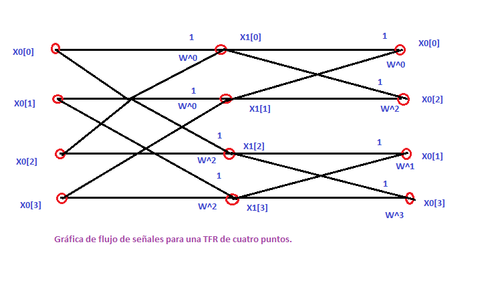



*Segundo Punto*




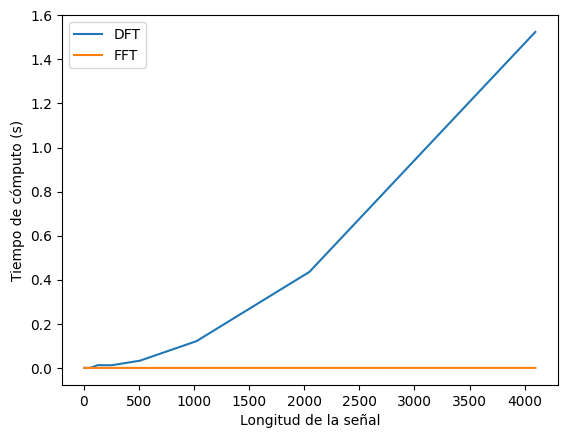

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt

def DFT (x):
  L= len (x)
  l=np.arange (L)
  p=l.reshape ((L,1))
  y= np.exp(-2j* np.pi* p * l /L)

def FFT (x):
  return np.fft.fft(x)

input_lengths =[8,16,32,64,128,256,512,1024,2048,4096]
dft_times= []
fft_times= []

for L in input_lengths:
  x=np.random.rand(L)

  start_time = time.time()
  DFT (x)
  dft_times.append(time.time()- start_time) #Hallamos el tiempo actual

  start_time  = time.time()
  FFT (x)
  fft_times.append (time.time()- start_time)

plt.plot(input_lengths, dft_times, label= 'DFT')
plt.plot(input_lengths, fft_times, label= 'FFT')
plt.xlabel ('Longitud de la señal')
plt.ylabel(('Tiempo de cómputo (s)'))
plt.legend()
plt.show()

*Tercer Punto*

In [ ]:
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 11.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.7/129.7 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 59.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.2/357.2 kB 34.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 17.7 MB/s eta 0:00:00
  Created wheel for yt-dlp: filename=yt_dlp-2023.3.4-py2.py3-none-any.whl size=2687262 sha256=f60bcddd6b2f06085911e65c6ae3b11cf8eda29cb4222e6d937900db498e56f3
  Stored in directory: /tmp/pip-ephem-wheel-cache-fintooos/wheels/17/62/6f/3db33a8

In [ ]:
link="https://www.youtube.com/watch?v=WHejvUhX6rk"
!yt-dlp --extract-audio -o "audio" --audio-format mp3 {link}

[youtube] Extracting URL: https://www.youtube.com/watch?v=WHejvUhX6rk
[youtube] WHejvUhX6rk: Downloading webpage
[youtube] WHejvUhX6rk: Downloading android player API JSON
[youtube] WHejvUhX6rk: Downloading player 6f20102c
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = fBL0VVB0kqcx4E ; player = https://www.youtube.com/s/player/6f20102c/player_ias.vflset/en_US/base.js
[info] WHejvUhX6rk: Downloading 1 format(s): 251
[download] Destination: audio
[download] 100% of    3.73MiB in 00:00:00 at 75.66MiB/s
[ExtractAudio] Destination: audio.mp3
Deleting original file audio (pass -k to keep)


In [ ]:
!ffmpeg -i audio.mp3 output.wav

ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

In [ ]:
!pip install soundfile

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import soundfile as sf # para instalar pip install soundfile
#lee archivos wav
nombre_out = "output.wav"
x, fs = sf.read(nombre_out)
# read speech signal from file
print('Frecuencia de muestreo %.2f[Hz]\naudio %s' % (fs,nombre_out))

Frecuencia de muestreo 48000.00[Hz]
audio output.wav


In [ ]:
x.shape

(10488547, 2)

In [ ]:
from IPython.display import Audio
ns = 30 #se reproducen los primeros ns segundos
w=25
Audio(x[int(w*fs):int(fs*(ns+w)),:].T,rate=fs)

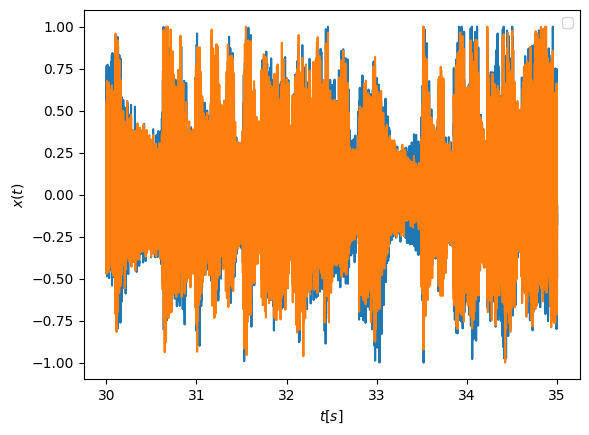

In [ ]:
# Grafico de Señal
import numpy as np
import matplotlib.pyplot as plt

xpro = x.copy() #copiar archivos para procesar
ti = 30 #tiempo incio a procesar seg
tf = 35 #tiempo final a procesar seg
xs = xpro[int(ti*fs):int((tf*fs)),:]

tt = np.arange(ti,tf,1/fs) # vector de tiempo
plt.plot(tt,xs)
plt.legend(('canal 1','canal 2'))
plt.xlabel('$t[s]$')
plt.ylabel('$x(t)$')
plt.legend()
plt.show()

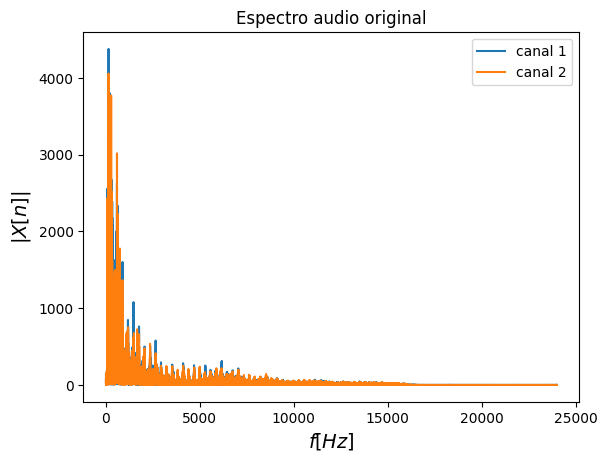

In [ ]:
# Espectro de Fourier para cada canal

Xw = np.fft.rfft(xs,axis=0) # axis=0 permite aplicar fft por cada columna de xpro
vf = np.fft.rfftfreq(np.size(xs,0),1/fs) #se crea el vector de frecuencias
plt.plot(vf,abs(Xw))#se grafica la magnitud
plt.legend(('canal 1','canal 2'))
plt.title(r'Espectro audio original')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|X[n]|$',fontsize = 14)
plt.show()

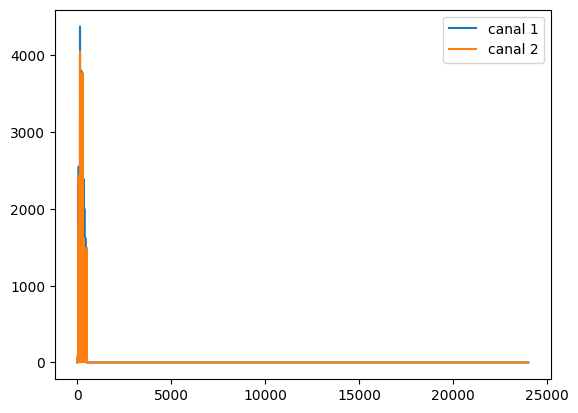

In [ ]:
## FILTRO PASA BAJAS
#filtrar espectro
Xwf = Xw.copy()
f1 = 20 #frecuencia en Hz corte 1
f2 = 500 #frecuencia en Hz corte 2
ind = ~((vf > f1) & (vf < f2)) #frecuencias eliminar-> recueder que ~ actua como negación
Xwf[ind,:] = 0
plt.plot(vf,abs(Xwf))
plt.legend(('canal 1','canal 2'))
plt.show()

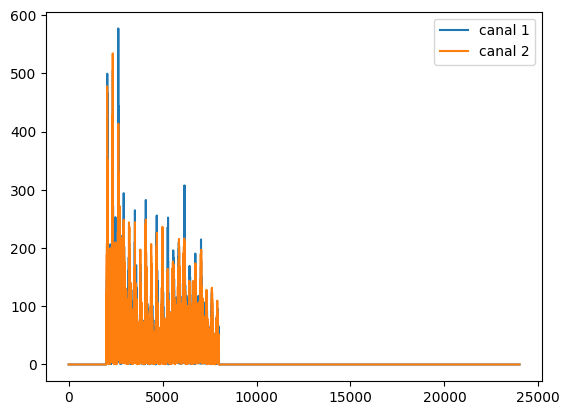

In [ ]:
## FILTRO PASA ALTAS
#filtrar espectro
Xwf = Xw.copy()
f1 = 2000 #frecuencia en Hz corte 1
f2 = 8000 #frecuencia en Hz corte 2
ind = ~((vf > f1) & (vf < f2)) #frecuencias eliminar-> recueder que ~ actua como negación
Xwf[ind,:] = 0
plt.plot(vf,abs(Xwf))
plt.legend(('canal 1','canal 2'))
plt.show()

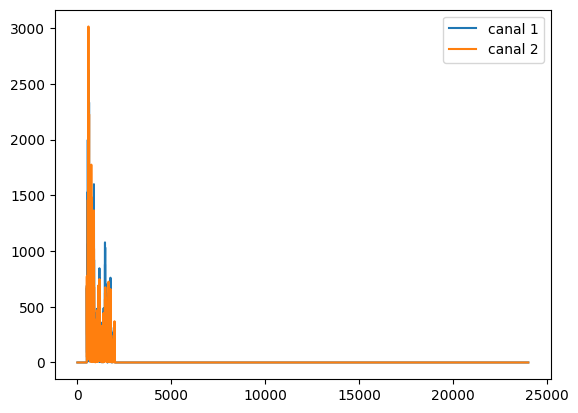

In [ ]:
## FILTRO PASA BANDAS
#filtrar espectro
Xwf = Xw.copy()
f1 = 500 #frecuencia en Hz corte 1
f2 = 2000 #frecuencia en Hz corte 2
ind = ~((vf > f1) & (vf < f2)) #frecuencias eliminar-> recueder que ~ actua como negación
Xwf[ind,:] = 0
plt.plot(vf,abs(Xwf))
plt.legend(('canal 1','canal 2'))
plt.show()

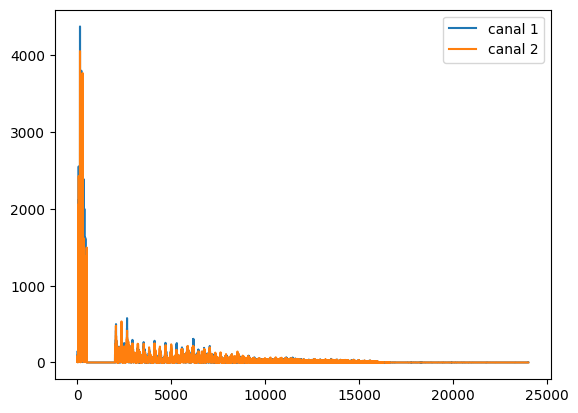

In [ ]:
## FILTRO RECHAZA BANDAS
#filtrar espectro
Xwf = Xw.copy()
f1 = 500 #frecuencia en Hz corte 1
f2 = 2000 #frecuencia en Hz corte 2
ind = (vf > f1) & (vf < f2) #frecuencias eliminar
Xwf[ind,:] = 0
plt.plot(vf,abs(Xwf))
plt.legend(('canal 1','canal 2'))
plt.show()